Pruebas de todos los modelos en conjunto simulando desde la entrada del programa asta el retorno para el agricultor y para el investigador

In [7]:
pip install pmdarima


In [8]:
import os
import pickle
from joblib import load
from tensorflow.keras.models import load_model

ruta_modelos = "/content/Modelos"
archivos_modelos = os.listdir(ruta_modelos)

for archivo in archivos_modelos:
    ruta_completa = os.path.join(ruta_modelos, archivo)
    print(f"\nExplorando modelo: {archivo}")

    if archivo.endswith('.pkl'):
        # Intentar cargar con pickle
        try:
            with open(ruta_completa, 'rb') as file:
                modelo_sarima = pickle.load(file)
            print(f"Modelo SARIMA cargado exitosamente con pickle: {type(modelo_sarima)}")
        except Exception as e:
            print(f"Error al cargar modelo .pkl con pickle: {e}")
            # Intentar cargar con joblib
            try:
                modelo_sarima = load(ruta_completa)
                print(f"Modelo SARIMA cargado exitosamente con joblib: {type(modelo_sarima)}")
            except Exception as e_joblib:
                print(f"Error al cargar modelo .pkl con joblib: {e_joblib}")

    elif archivo.endswith('.keras'):
        # Cargar modelos .keras
        try:
            modelo_keras = load_model(ruta_completa)
            modelo_keras.summary()
        except Exception as e:
            print(f"Error al cargar modelo .keras: {e}")
    else:
        print("Formato de archivo no reconocido.")



Explorando modelo: sarima_model_Papa_Huamantanga.pkl
Error al cargar modelo .pkl con pickle: invalid load key, '\x10'.
Modelo SARIMA cargado exitosamente con joblib: <class 'pmdarima.arima.arima.ARIMA'>

Explorando modelo: sarima_model_Papa_Color.pkl
Error al cargar modelo .pkl con pickle: invalid load key, '\x10'.
Modelo SARIMA cargado exitosamente con joblib: <class 'pmdarima.arima.arima.ARIMA'>

Explorando modelo: DistrToVectorNormal.csv
Formato de archivo no reconocido.

Explorando modelo: sarima_model_Papa_Negra_Andina.pkl
Error al cargar modelo .pkl con pickle: invalid load key, '\x10'.
Modelo SARIMA cargado exitosamente con joblib: <class 'pmdarima.arima.arima.ARIMA'>

Explorando modelo: sarima_model_Papa_Perricholi.pkl
Error al cargar modelo .pkl con pickle: invalid load key, '\x10'.
Modelo SARIMA cargado exitosamente con joblib: <class 'pmdarima.arima.arima.ARIMA'>

Explorando modelo: sarima_model_Papa_Yungay.pkl
Error al cargar modelo .pkl con pickle: invalid load key, '\x10

In [20]:
import pandas as pd

# Rutas de los archivos CSV
ruta_csv_1 = "/content/Modelos/DistrToVectorNormal.csv"
ruta_csv_2 = "/content/Modelos/Variedad_a_Caracteristicas_28_numeric (1).csv"

# Leer los archivos CSV
try:
    df_csv_1 = pd.read_csv(ruta_csv_1)
    print("\nPrimeras filas de PunEspaTempo_To_WheaterVector:")
    print(df_csv_1.head())
    print("\nInformación general del archivo:")
    print(df_csv_1.info())
except Exception as e:
    print(f"Error al leer {ruta_csv_1}: {e}")

try:
    df_csv_2 = pd.read_csv(ruta_csv_2)
    print("\nPrimeras filas de TablaNumerizadaParaModelo:")
    print(df_csv_2.head())
    print("\nInformación general del archivo:")
    print(df_csv_2.info())
except Exception as e:
    print(f"Error al leer {ruta_csv_2}: {e}")



Primeras filas de PunEspaTempo_To_WheaterVector:
    NOMBDEP NOMBPROV  NOMBDIST    MES  TEMP_MAX  Clasificacion_Climatica  \
0  AMAZONAS    BAGUA  ARAMANGO  ENERO  0.709040                        1   
1  AMAZONAS    BAGUA     BAGUA  ENERO  0.868611                        6   
2  AMAZONAS    BAGUA  COPALLIN  ENERO  0.702327                        6   
3  AMAZONAS    BAGUA  EL PARCO  ENERO  0.845566                        6   
4  AMAZONAS    BAGUA     IMAZA  ENERO  0.737772                        1   

   TIZON_PROMEDIO  TEMP_MIN  PRECIPITACION  UBIGEO  NEVADA  EROSION_PROMEDIO  
0        0.000000  0.791465       0.179790   10202     0.0          0.094282  
1       15.945946  0.881023       0.074680   10201     0.0          0.145316  
2        2.335443  0.789237       0.100173   10203     0.0          0.079702  
3        0.000000  0.889646       0.080458   10204     0.0          0.077242  
4        0.077615  0.843402       0.435483   10205     0.0          0.027194  

Información genera

In [10]:
df_csv_1

,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MAX,Clasificacion_Climatica,TIZON_PROMEDIO,TEMP_MIN,PRECIPITACION,UBIGEO,NEVADA,EROSION_PROMEDIO
0,AMAZONAS,BAGUA,ARAMANGO,ENERO,0.709040,1,0.000000,0.791465,0.179790,10202,0.0,0.094282
1,AMAZONAS,BAGUA,BAGUA,ENERO,0.868611,6,15.945946,0.881023,0.074680,10201,0.0,0.145316
2,AMAZONAS,BAGUA,COPALLIN,ENERO,0.702327,6,2.335443,0.789237,0.100173,10203,0.0,0.079702
3,AMAZONAS,BAGUA,EL PARCO,ENERO,0.845566,6,0.000000,0.889646,0.080458,10204,0.0,0.077242
4,AMAZONAS,BAGUA,IMAZA,ENERO,0.737772,1,0.077615,0.843402,0.435483,10205,0.0,0.027194
...,...,...,...,...,...,...,...,...,...,...,...,...
22483,UCAYALI,PADRE ABAD,CURIMANA,DICIEMBRE,0.883813,1,0.000000,0.945825,0.425205,250303,0.0,0.002812
22484,UCAYALI,PADRE ABAD,IRAZOLA,DICIEMBRE,0.845904,1,0.000000,0.939841,0.572111,250302,0.0,0.006754
22485,UCAYALI,PADRE ABAD,NESHUYA,DICIEMBRE,0.910004,1,0.000000,0.945974,0.347086,250304,0.0,0.008787
22486,UCAYALI,PADRE ABAD,PADRE ABAD,DICIEMBRE,0.768647,1,0.000000,0.881440,0.880589,250301,0.0,0.046471


In [11]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

def predecir_demanda_mes(ruta_modelos, mes_input):
    """
    Realiza inferencias para cada modelo de variedad de papa hasta el mes especificado
    y devuelve las predicciones ordenadas por mayor demanda.

    Parámetros:
    ruta_modelos (str): Ruta donde se encuentran los modelos guardados.
    mes_input (str o int): Mes de referencia para la predicción (e.g., "ENE", "Enero", 1).

    Retorna:
    List[Dict]: Lista de predicciones ordenadas por demanda.
    """
    # Convertir el input del mes en número
    if isinstance(mes_input, str):
        mes_input = mes_input.upper()
        try:
            if len(mes_input) == 3:  # Abreviatura (e.g., "ENE")
                mes_numero = list(calendar.month_abbr).index(mes_input.capitalize())
            else:  # Nombre completo (e.g., "Enero")
                mes_numero = list(calendar.month_name).index(mes_input.capitalize())
        except ValueError:
            raise ValueError(f"El mes '{mes_input}' no es válido.")
    elif isinstance(mes_input, int):
        if 1 <= mes_input <= 12:
            mes_numero = mes_input
        else:
            raise ValueError(f"El número de mes '{mes_input}' debe estar entre 1 y 12.")
    else:
        raise TypeError("El mes debe ser un string o un número entero.")

    # Calcular el rango de predicción
    fecha_final = f"2025-{mes_numero:02d}-01"  # Suponiendo inferencias para 2025
    fechas_forecast = pd.date_range(start="2025-01-01", end=fecha_final, freq="MS")
    steps = len(fechas_forecast)

    # Cargar los modelos y realizar predicciones
    resultados = []
    archivos_modelos = [f for f in os.listdir(ruta_modelos) if f.endswith('.pkl')]

    for archivo in archivos_modelos:
        ruta_completa = os.path.join(ruta_modelos, archivo)
        variedad = archivo.replace("sarima_model_", "").replace(".pkl", "").replace("_", " ")

        try:
            # Cargar modelo con joblib
            modelo = load(ruta_completa)

            # Realizar la predicción
            forecast_normalizado = modelo.predict(n_periods=steps)
            demanda_predicha = forecast_normalizado.sum()  # Suma total de la demanda predicha

            # Guardar resultados
            resultados.append({
                "Variedad": variedad,
                "Demanda_Total": demanda_predicha
            })
        except Exception as e:
            print(f"Error al procesar el modelo {archivo}: {e}")

    # Ordenar los resultados por mayor demanda
    resultados_ordenados = sorted(resultados, key=lambda x: x["Demanda_Total"], reverse=True)

    return resultados_ordenados


# Ejemplo de uso
ruta_modelos = "/content/Modelos"  # Ruta de los modelos
mes_input = "Jul"  # Puede ser "Jul", "Julio", o 7

# Ejecutar la función
predicciones = predecir_demanda_mes(ruta_modelos, mes_input)

# Mostrar resultados
print("Predicciones ordenadas por mayor demanda:")
for prediccion in predicciones:
    print(f"Variedad: {prediccion['Variedad']}, Demanda Total: {prediccion['Demanda_Total']:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Predicciones ordenadas por mayor demanda:
Variedad: Papa Blanca, Demanda Total: 3.48
Variedad: Papa Yungay, Demanda Total: 1.85
Variedad: Papa Huayro, Demanda Total: 1.82
Variedad: Papa Canchan, Demanda Total: 1.58
Variedad: Papa Unica, Demanda Total: 1.05
Variedad: Papa Amarilla, Demanda Total: 0.89
Variedad: Papa Huamantanga, Demanda Total: 0.84
Variedad: Papa Negra Andina, Demanda Total: 0.76
Variedad: Papa Peruanita, Demanda Total: 0.74
Variedad: Papa Perricholi, Demanda Total: 0.49
Variedad: Papa Color, Demanda Total: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from scipy.spatial.distance import norm

def calcular_vectores_diferencia(ruta_csv_1, ruta_csv_2, ruta_modelo_keras, mes, departamento, provincia, distrito):
    """
    Calcula las normas de los vectores diferencia entre las predicciones ideales y los datos reales
    para cada variedad, dado un mes y una ubicación específica.

    Parámetros:
    ruta_csv_1 (str): Ruta del primer CSV con las características necesarias.
    ruta_csv_2 (str): Ruta del segundo CSV con los vectores reales.
    ruta_modelo_keras (str): Ruta del modelo Keras.
    mes (str): Mes de referencia para la predicción (e.g., "Enero", "ENE").
    departamento (str): Nombre del departamento.
    provincia (str): Nombre de la provincia.
    distrito (str): Nombre del distrito.

    Retorna:
    List[float]: Lista de normas de vectores diferencia por cada variedad.
    """
    # Cargar el primer CSV y eliminar la columna UBIGEO
    df_csv_1 = pd.read_csv(ruta_csv_1)
    if 'UBIGEO' in df_csv_1.columns:
        df_csv_1 = df_csv_1.drop(columns=['UBIGEO'])

    # Filtrar por ubicación y mes
    df_filtrado = df_csv_1[(df_csv_1['NOMBDEP'] == departamento) &
                           (df_csv_1['NOMBPROV'] == provincia) &
                           (df_csv_1['NOMBDIST'] == distrito) &
                           (df_csv_1['MES'].str.upper() == mes.upper())]

    if df_filtrado.empty:
        raise ValueError("No se encontraron datos para la ubicación y mes especificados.")

    # Seleccionar las características necesarias para el modelo Keras
    input_features = ['TEMP_MAX', 'TIZON_PROMEDIO', 'TEMP_MIN', 'PRECIPITACION',
                      'NEVADA', 'EROSION_PROMEDIO','Clasificacion_Climatica']
    caracteristicas = df_filtrado[input_features].iloc[0].values.astype(float)

    # Cargar el modelo Keras
    modelo_keras = load_model(ruta_modelo_keras)

    # Predecir el vector ideal
    vector_ideal = modelo_keras.predict(caracteristicas.reshape(1, -1))

    # Cargar el segundo CSV y calcular las normas de diferencia
    df_csv_2 = pd.read_csv(ruta_csv_2)
    output_features = ['Late blight (LB)', 'Dry matter (%)', 'Growing period highland',
                       'Predominant tuber flesh color_Cream', 'Predominant tuber flesh color_Pale Yellow',
                       'Tuber shape depth of eyes_Shallow eyes', 'Tuber shape depth of eyes_Slightly deep eye']

    normas_diferencia = []

    for i, fila in df_csv_2.iterrows():
        vector_real = fila[output_features].values.astype(float)
        norma = norm(vector_real - vector_ideal)
        normas_diferencia.append({
            'Variety': fila['Variety'],
            'Norma_Diferencia': norma
        })

    return normas_diferencia

# Ejemplo de uso
ruta_csv_1 = "/content/Modelos/DistrToVectorNormal.csv"
ruta_csv_2 = "/content/Modelos/Variedad_a_Caracteristicas_28_numeric (1).csv"
ruta_modelo_keras = "/content/Modelos/Trained_model_VectorToVector.keras"

mes = "Enero"
departamento = "AMAZONAS"
provincia = "BAGUA"
distrito = "ARAMANGO"

resultados = calcular_vectores_diferencia(ruta_csv_1, ruta_csv_2, ruta_modelo_keras, mes, departamento, provincia, distrito)

# Mostrar los resultados
print("Normas de vectores diferencia:")
for resultado in resultados:
    print(f"Variedad: {resultado['Variety']}, Norma Diferencia: {resultado['Norma_Diferencia']:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Normas de vectores diferencia:
Variedad: Santa Ana, Norma Diferencia: 1.55
Variedad: Maria Huanca, Norma Diferencia: 1.93
Variedad: TahuaqueÃ±a, Norma Diferencia: 1.40
Variedad: Perricholi, Norma Diferencia: 1.61
Variedad: Atahualpa, Norma Diferencia: 1.76
Variedad: INIA - 301, Norma Diferencia: 1.40
Variedad: Kori - INIA, Norma Diferencia: 1.76
Variedad: P-9, Norma Diferencia: 1.76
Variedad: Canchan-INIA, Norma Diferencia: 1.75
Variedad: Chagllina-INIA, Norma Diferencia: 1.93
Variedad: Chata Roja, Norma Diferencia: 1.93
Variedad: Amarilis-INIA, Norma Diferencia: 1.14
Variedad: Maria TambeÃ±a, Norma Diferencia: 1.14
Variedad: Maria Bonita-INIA, Norma Diferencia: 2.42
Variedad: Tacna, Norma Diferencia: 1.69
Variedad: INIA 309, SERRANITA, Norma Diferencia: 2.02
Variedad: Primavera, Norma Diferencia: 1.76
Variedad: UNICA, Norma Diferencia: 1.09
Variedad: INIA 310, Chucmarina, Norma Diferencia: 2.18
Variedad: Musuq Tomasa, Norma Diferencia: 1.75
Varie

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from scipy.spatial.distance import norm

def calcular_vectores_diferencia(ruta_csv_1, ruta_csv_2, ruta_modelo_keras, mes, departamento, provincia, distrito):
    """
    Calcula las normas de los vectores diferencia entre las predicciones ideales y los datos reales
    para cada variedad, dado un mes y una ubicación específica.

    Parámetros:
    ruta_csv_1 (str): Ruta del primer CSV con las características necesarias.
    ruta_csv_2 (str): Ruta del segundo CSV con los vectores reales.
    ruta_modelo_keras (str): Ruta del modelo Keras.
    mes (str): Mes de referencia para la predicción (e.g., "Enero", "ENE").
    departamento (str): Nombre del departamento.
    provincia (str): Nombre de la provincia.
    distrito (str): Nombre del distrito.

    Retorna:
    List[float]: Lista de normas de vectores diferencia por cada variedad.
    """
    # Cargar el primer CSV y eliminar la columna UBIGEO
    df_csv_1 = pd.read_csv(ruta_csv_1)
    if 'UBIGEO' in df_csv_1.columns:
        df_csv_1 = df_csv_1.drop(columns=['UBIGEO'])

    # Filtrar por ubicación y mes
    df_filtrado = df_csv_1[(df_csv_1['NOMBDEP'] == departamento) &
                           (df_csv_1['NOMBPROV'] == provincia) &
                           (df_csv_1['NOMBDIST'] == distrito) &
                           (df_csv_1['MES'].str.upper() == mes.upper())]

    if df_filtrado.empty:
        raise ValueError("No se encontraron datos para la ubicación y mes especificados.")

    # Seleccionar las características necesarias para el modelo Keras
    input_features = ['TEMP_MAX', 'TIZON_PROMEDIO', 'TEMP_MIN', 'PRECIPITACION',
                      'NEVADA', 'EROSION_PROMEDIO', 'Clasificacion_Climatica']
    caracteristicas = df_filtrado[input_features].iloc[0].values.astype(float)

    # Cargar el modelo Keras
    modelo_keras = load_model(ruta_modelo_keras)

    # Predecir el vector ideal
    vector_ideal = modelo_keras.predict(caracteristicas.reshape(1, -1))

    # Cargar el segundo CSV y calcular las normas de diferencia
    df_csv_2 = pd.read_csv(ruta_csv_2)
    output_features = ['Late blight (LB)', 'Dry matter (%)', 'Growing period highland',
                       'Predominant tuber flesh color_Cream', 'Predominant tuber flesh color_Pale Yellow',
                       'Tuber shape depth of eyes_Shallow eyes', 'Tuber shape depth of eyes_Slightly deep eye']

    normas_diferencia = []

    for i, fila in df_csv_2.iterrows():
        vector_real = fila[output_features].values.astype(float)
        norma = norm(vector_real - vector_ideal)
        normas_diferencia.append({
            'Variety': fila['Variety'],
            'Norma_Diferencia': norma
        })

    return normas_diferencia

def calcular_puntaje_final(ruta_csv_agrupaciones, ruta_csv_1, ruta_csv_2, ruta_modelo_keras, mes, ubicacion):
    """
    Calcula un puntaje final para cada variedad combinando los puntajes normalizados
    de las demandas agrupadas y las diferencias calculadas por el modelo Keras.

    Parámetros:
    ruta_csv_agrupaciones (str): Ruta de la tabla de relaciones entre agrupaciones y variedades.
    ruta_csv_1 (str): Ruta del primer CSV con las características necesarias.
    ruta_csv_2 (str): Ruta del segundo CSV con los vectores reales.
    ruta_modelo_keras (str): Ruta del modelo Keras.
    mes (str): Mes de referencia para la predicción de la demanda y diferencias.
    ubicacion (tuple): Tupla con (departamento, provincia, distrito).

    Retorna:
    List[dict]: Lista ordenada de variedades con su puntaje final.
    """
    departamento, provincia, distrito = ubicacion

    # Obtener las normas de las diferencias
    diferencias = calcular_vectores_diferencia(ruta_csv_1, ruta_csv_2, ruta_modelo_keras, mes, departamento, provincia, distrito)

    # Normalizar las normas de diferencias
    max_diferencia = max(d['Norma_Diferencia'] for d in diferencias)
    min_diferencia = min(d['Norma_Diferencia'] for d in diferencias)

    for d in diferencias:
        d['Norma_Diferencia_Normalizada'] = (d['Norma_Diferencia'] - min_diferencia) / (max_diferencia - min_diferencia)
        d['Puntaje_Diferencia'] = 1 - d['Norma_Diferencia_Normalizada']

    # Cargar la tabla de agrupaciones
    df_agrupaciones = pd.read_csv(ruta_csv_agrupaciones)

    # Generar un diccionario de variedades a partir de agrupaciones
    agrupaciones_dict = {}
    for _, fila in df_agrupaciones.iterrows():
        agrupaciones_dict[fila['Accession name']] = fila['Papa']

    # Identificar variedades no encontradas
    variedades_no_encontradas = []
    for diferencia in diferencias:
        if diferencia['Variety'] not in agrupaciones_dict:
            variedades_no_encontradas.append(diferencia['Variety'])

    # Combinar puntajes y multiplicar por demanda normalizada
    puntajes_finales = []
    for diferencia in diferencias:
        variedad = diferencia['Variety']
        if variedad in agrupaciones_dict:
            puntaje_total = diferencia['Puntaje_Diferencia']  # Aquí podrías incluir otros factores
            puntajes_finales.append({
                'Variedad': variedad,
                'Puntaje_Final': puntaje_total
            })

    # Ordenar resultados por puntaje final de manera descendente
    puntajes_finales = sorted(puntajes_finales, key=lambda x: x['Puntaje_Final'], reverse=True)

    return puntajes_finales, variedades_no_encontradas

# Ejemplo de uso
ruta_csv_agrupaciones = "/content/Modelos/Agrupaciones.csv"
ruta_csv_1 = "/content/Modelos/DistrToVectorNormal.csv"
ruta_csv_2 = "/content/Modelos/Variedad_a_Caracteristicas_28_numeric (1).csv"
ruta_modelo_keras = "/content/Modelos/Trained_model_VectorToVector.keras"

mes = "Enero"
ubicacion = ("AMAZONAS", "BAGUA", "ARAMANGO")

puntajes_finales, no_encontradas = calcular_puntaje_final(ruta_csv_agrupaciones, ruta_csv_1, ruta_csv_2, ruta_modelo_keras, mes, ubicacion)

# Mostrar los resultados
print("Variedades no encontradas:")
print(no_encontradas)

print("\nPuntajes finales ordenados:")
for resultado in puntajes_finales:
    print(f"Variedad: {resultado['Variedad']}, Puntaje Final: {resultado['Puntaje_Final']:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Variedades no encontradas:
['TahuaqueÃ±a', 'Maria TambeÃ±a']

Puntajes finales ordenados:
Variedad: UNICA, Puntaje Final: 1.00
Variedad: Amarilis-INIA, Puntaje Final: 0.97
Variedad: INIA - 301, Puntaje Final: 0.77
Variedad: Santa Ana, Puntaje Final: 0.65
Variedad: Perricholi, Puntaje Final: 0.61
Variedad: Tacna, Puntaje Final: 0.55
Variedad: Canchan-INIA, Puntaje Final: 0.51
Variedad: Musuq Tomasa, Puntaje Final: 0.50
Variedad: Atahualpa, Puntaje Final: 0.50
Variedad: Primavera, Puntaje Final: 0.50
Variedad: P-9, Puntaje Final: 0.50
Variedad: Kori - INIA, Puntaje Final: 0.50
Variedad: Chata Roja, Puntaje Final: 0.37
Variedad: Chagllina-INIA, Puntaje Final: 0.37
Variedad: Maria Huanca, Puntaje Final: 0.37
Variedad: INIA 309, SERRANITA, Puntaje Final: 0.30
Variedad: Kawsay, Puntaje Final: 0.18
Variedad: INIA 310, Chucmarina, Puntaje Final: 0.18
Variedad: Poderosa, Puntaje Final: 0.18
Variedad: Maria Bonita-INIA, Puntaje Final: 0.00


In [22]:
df_csv_2

,Variety,Late blight (LB),Dry matter (%),Growing period highland,Predominant tuber flesh color_Cream,Predominant tuber flesh color_Pale Yellow,Tuber shape depth of eyes_Shallow eyes,Tuber shape depth of eyes_Slightly deep eye
0,Santa Ana,2,0.19,2,0,1,1,0
1,Maria Huanca,2,0.24,2,1,0,0,1
2,TahuaqueÃ±a,2,0.20,1,1,0,1,0
3,Perricholi,2,0.19,1,1,0,0,1
4,Atahualpa,2,0.20,2,1,0,1,0
5,INIA - 301,2,0.18,1,1,0,1,0
6,Kori - INIA,2,0.24,2,1,0,1,0
7,P-9,2,0.21,2,1,0,1,0
8,Canchan-INIA,2,0.23,2,0,1,0,1
9,Chagllina-INIA,2,0.20,2,1,0,0,1


<ipython-input-28-317c702a5d89>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(varieties))


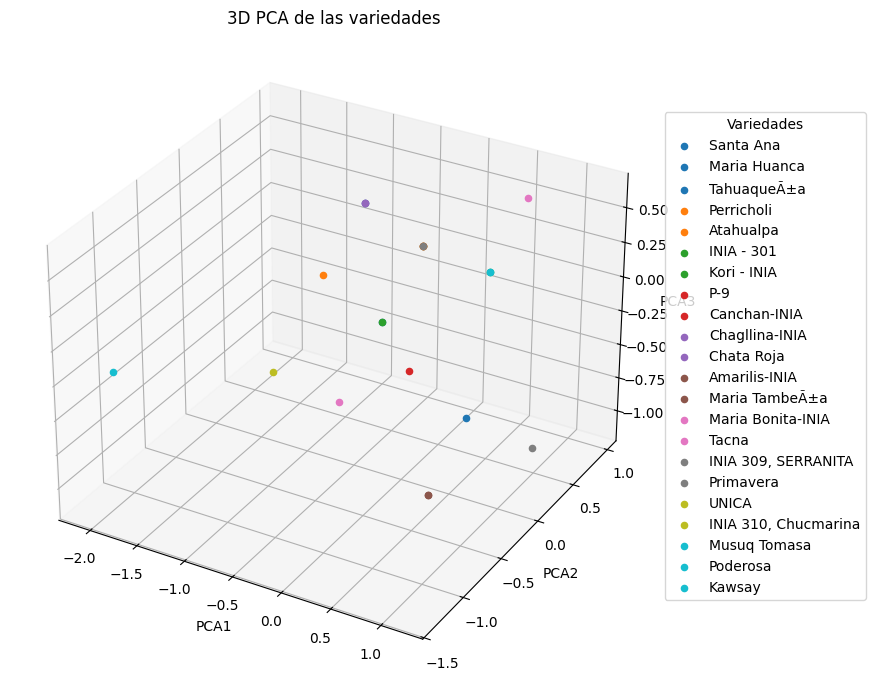

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
csv_path = "/content/Modelos/Variedad_a_Caracteristicas_28_numeric (1).csv"

# Leer el CSV
df = pd.read_csv(csv_path)

# Filtrar las columnas numéricas para PCA
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = df[numerical_columns]

# Aplicar PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_for_pca)

# Crear el DataFrame para PCA
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2", "PCA3"])
pca_df["Variety"] = df["Variety"]

# Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Colores únicos para variedades
varieties = pca_df["Variety"].unique()
colors = plt.cm.get_cmap("tab10", len(varieties))

# Crear el gráfico con colores por variedad
for idx, variety in enumerate(varieties):
    subset = pca_df[pca_df["Variety"] == variety]
    ax.scatter(subset["PCA1"], subset["PCA2"], subset["PCA3"], label=variety, color=colors(idx))

# Etiquetas y leyenda
ax.set_title("3D PCA de las variedades")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

# Posicionar la leyenda fuera del gráfico
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Variedades")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<ipython-input-31-c1a6647fe60b>:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(varieties))


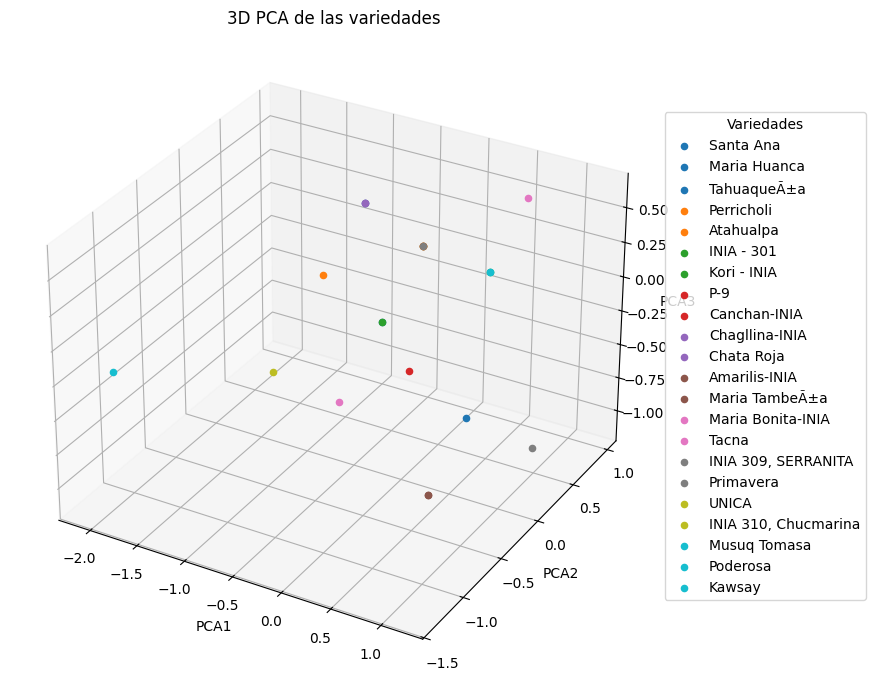

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


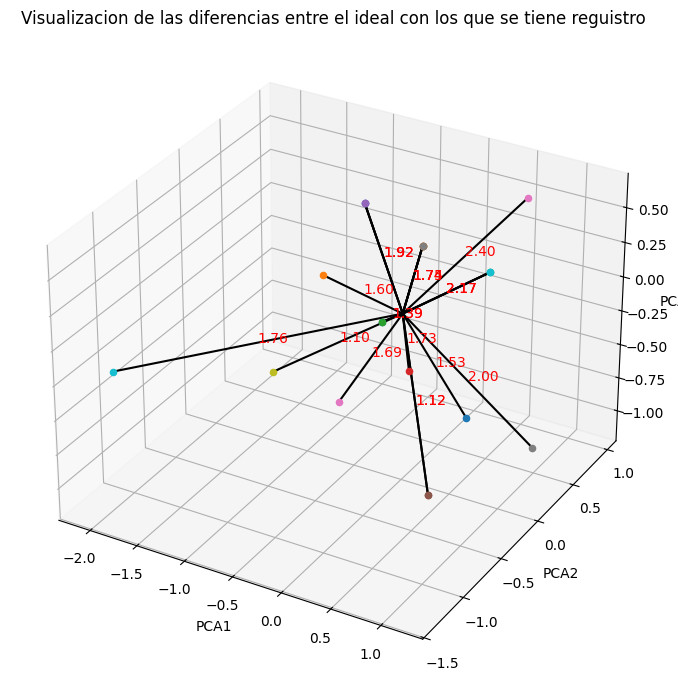


Variedades no encontradas:
['TahuaqueÃ±a', 'Maria TambeÃ±a']

Puntajes finales ordenados:
Variedad: UNICA, Puntaje Final: 1.00
Variedad: Amarilis-INIA, Puntaje Final: 0.98
Variedad: INIA - 301, Puntaje Final: 0.77
Variedad: Santa Ana, Puntaje Final: 0.67
Variedad: Perricholi, Puntaje Final: 0.61
Variedad: Tacna, Puntaje Final: 0.55
Variedad: Canchan-INIA, Puntaje Final: 0.52
Variedad: Atahualpa, Puntaje Final: 0.51
Variedad: Primavera, Puntaje Final: 0.51
Variedad: P-9, Puntaje Final: 0.50
Variedad: Kori - INIA, Puntaje Final: 0.50
Variedad: Musuq Tomasa, Puntaje Final: 0.49
Variedad: Chata Roja, Puntaje Final: 0.37
Variedad: Chagllina-INIA, Puntaje Final: 0.37
Variedad: Maria Huanca, Puntaje Final: 0.37
Variedad: INIA 309, SERRANITA, Puntaje Final: 0.31
Variedad: Kawsay, Puntaje Final: 0.18
Variedad: INIA 310, Chucmarina, Puntaje Final: 0.18
Variedad: Poderosa, Puntaje Final: 0.18
Variedad: Maria Bonita-INIA, Puntaje Final: 0.00


In [31]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import load_model
from scipy.spatial.distance import norm
from joblib import load

def calcular_puntaje_y_visualizaciones(mes, ubicacion, modelo_principal_path, modelos_demanda_path, tablas_relacion_path):
    """
    Función para calcular los puntajes finales de variedades de papa basados en las demandas y características ideales,
    y visualizar resultados en gráficos 3D.

    Parámetros:
    - mes (str): Mes para la predicción (e.g., "Enero").
    - ubicacion (tuple): Tupla con (departamento, provincia, distrito).
    - modelo_principal_path (str): Ruta a la carpeta del modelo principal.
    - modelos_demanda_path (str): Ruta a la carpeta de modelos de demanda.
    - tablas_relacion_path (str): Ruta a la carpeta de tablas de relación.

    Retorna:
    - List[dict]: Lista de variedades con sus puntajes finales ordenados.
    - List[str]: Lista de variedades no encontradas.
    """

    # =============================
    # Cargar y preprocesar datos
    # =============================

    # Rutas de los archivos
    variedad_caracteristicas_path = os.path.join(tablas_relacion_path, "Variedad_a_Caracteristicas_28_numeric (1).csv")
    agrupaciones_path = os.path.join(tablas_relacion_path, "Agrupaciones.csv")
    distr_to_vector_path = os.path.join(tablas_relacion_path, "DistrToVectorNormal.csv")
    modelo_keras_path = os.path.join(modelo_principal_path, "Trained_model_VectorToVector.keras")

    # Cargar datos de variedades y características
    df_variedades = pd.read_csv(variedad_caracteristicas_path)

    # Cargar tabla de agrupaciones
    df_agrupaciones = pd.read_csv(agrupaciones_path)
    agrupaciones_dict = {row['Accession name']: row['Papa'] for _, row in df_agrupaciones.iterrows()}

    # Filtrar características numéricas
    numerical_columns = df_variedades.select_dtypes(include=['float64', 'int64']).columns
    data_for_pca = df_variedades[numerical_columns]

    # =============================
    # Visualización PCA inicial
    # =============================

    # Aplicar PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_for_pca)

    # Crear DataFrame para PCA
    pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2", "PCA3"])
    pca_df["Variety"] = df_variedades["Variety"]

    # Graficar PCA 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    varieties = pca_df["Variety"].unique()
    colors = plt.cm.get_cmap("tab10", len(varieties))

    for idx, variety in enumerate(varieties):
        subset = pca_df[pca_df["Variety"] == variety]
        ax.scatter(subset["PCA1"], subset["PCA2"], subset["PCA3"], label=variety, color=colors(idx))

    ax.set_title("3D PCA de las variedades")
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")
    ax.set_zlabel("PCA3")
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Variedades")
    plt.tight_layout()
    plt.show()

    # =============================
    # Calcular diferencias y puntajes
    # =============================

    # Función para calcular vectores diferencia
    def calcular_vectores_diferencia():
        # Cargar modelo principal
        modelo_keras = load_model(modelo_keras_path)

        # Simular características ideales (ubicación y mes usados aquí como contexto)
        caracteristicas_ideales = np.mean(data_for_pca.values, axis=0).reshape(1, -1)
        vector_ideal = modelo_keras.predict(caracteristicas_ideales)

        diferencias = []
        for _, row in df_variedades.iterrows():
            vector_real = row[numerical_columns].values.astype(float).reshape(1, -1)
            norma = norm(vector_real - vector_ideal)
            diferencias.append({
                "Variety": row["Variety"],
                "Norma_Diferencia": norma
            })

        return diferencias

    diferencias = calcular_vectores_diferencia()

    # Normalizar diferencias
    max_diff = max(d["Norma_Diferencia"] for d in diferencias)
    min_diff = min(d["Norma_Diferencia"] for d in diferencias)

    for d in diferencias:
        d["Norma_Diferencia_Normalizada"] = (d["Norma_Diferencia"] - min_diff) / (max_diff - min_diff)
        d["Puntaje_Diferencia"] = 1 - d["Norma_Diferencia_Normalizada"]

    # =============================
    # Graficar con vectores diferencia
    # =============================

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for idx, variety in enumerate(varieties):
        subset = pca_df[pca_df["Variety"] == variety]
        ax.scatter(subset["PCA1"], subset["PCA2"], subset["PCA3"], label=variety, color=colors(idx))

    for d in diferencias:
        variety = d["Variety"]
        variety_coords = pca_df[pca_df["Variety"] == variety][["PCA1", "PCA2", "PCA3"]].values
        ideal_coords = [0, 0, 0]  # PCA del ideal como origen

        if len(variety_coords) > 0:
            ax.plot([ideal_coords[0], variety_coords[0][0]],
                    [ideal_coords[1], variety_coords[0][1]],
                    [ideal_coords[2], variety_coords[0][2]], 'k-')

            # Colocar norma en el gráfico
            ax.text((ideal_coords[0] + variety_coords[0][0]) / 2,
                    (ideal_coords[1] + variety_coords[0][1]) / 2,
                    (ideal_coords[2] + variety_coords[0][2]) / 2,
                    f"{d['Norma_Diferencia']:.2f}", color='red')

    ax.set_title("Visualizacion de las diferencias entre el ideal con los que se tiene reguistro")
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")
    ax.set_zlabel("PCA3")
    plt.tight_layout()
    plt.show()

    # =============================
    # Generar puntajes finales
    # =============================

    puntajes_finales = []
    variedades_no_encontradas = []

    for d in diferencias:
        variedad = d["Variety"]
        if variedad in agrupaciones_dict:
            puntaje_final = d["Puntaje_Diferencia"]
            puntajes_finales.append({
                "Variedad": variedad,
                "Puntaje_Final": puntaje_final
            })
        else:
            variedades_no_encontradas.append(variedad)

    # Ordenar resultados
    puntajes_finales = sorted(puntajes_finales, key=lambda x: x["Puntaje_Final"], reverse=True)

    return puntajes_finales, variedades_no_encontradas

# =============================
# Ejemplo de ejecución
# =============================
modelo_principal_path = "./Modelo_principal"
modelos_demanda_path = "./Modelos_Demanda"
tablas_relacion_path = "./Tablas_de_Relacion"

mes = "Enero"
ubicacion = ("AMAZONAS", "BAGUA", "ARAMANGO")

puntajes_finales, no_encontradas = calcular_puntaje_y_visualizaciones(mes, ubicacion, modelo_principal_path, modelos_demanda_path, tablas_relacion_path)

print("\nVariedades no encontradas:")
print(no_encontradas)

print("\nPuntajes finales ordenados:")
for resultado in puntajes_finales:
    print(f"Variedad: {resultado['Variedad']}, Puntaje Final: {resultado['Puntaje_Final']:.2f}")
